# Assignment 1: Prediction of Airline passengers

**Learning Team 3**
- Francis Mark M. Cayco
- Eros Paul V. Estante
- Andrel Heber M. Jison
- Angela Elaine F. Pelayo

**Masters of Science in Data Science**

COSCI222_0 - Machine Learning 2 


Consider the international airline passengers data from January 1949 to December 1960 here: https://www.kaggle.com/datasets/andreazzini/international-airline-passengers


(1) Forecast using ARIMA the last twelve months (1 year, January-December 1960) with the most optimal choice of p,d,q [10 pts]

(2) Compare the results' RMSE, MAE, and run time with optimal XGBoost. [10 pts]



Pogi si Eros

In [28]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

## EDA

TODO: Perform preprocessing and exploratory data analysis on the dataset.

In [3]:
df = pd.read_csv('assets/international-airline-passengers.csv')
df.columns = ['Date','Passengers']
df.dropna(axis=0, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')
df_train = df[df['Date'] < '1960-01-01']
df_test = df[df['Date'] >= '1960-01-01']

## Forecasting Using ARIMA

In [4]:
p_values = range(0, 10)
d_values = range(0, 1)
q_values = range(0, 10)

In [25]:
model = []
rmse = []
forecasts = []

for p, d, q, in product(p_values, d_values, q_values):
    arima = ARIMA(df_train['Passengers'], order=(p,d,q))
    arima_fit = arima.fit()
    forecast = arima_fit.get_forecast(steps=len(df_test))
    forecast_values = forecast.predicted_mean.values
    forecasts.append(forecast_values)
    model.append((p, d, q))
    rmse.append(root_mean_squared_error(df_test['Passengers'], forecast_values))


/opt/anaconda3/envs/msds_env/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/envs/msds_env/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/envs/msds_env/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/envs/msds_env/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt

In [26]:
best_model = model[np.argmin(rmse)]
# best_forecast = forecast[np.argmin(rmse)]
print('Best Model:', best_model)
print('Root Mean Squared Error:', np.min(rmse))

Best Model: (7, 1, 7)
Root Mean Squared Error: 24.156798424410912


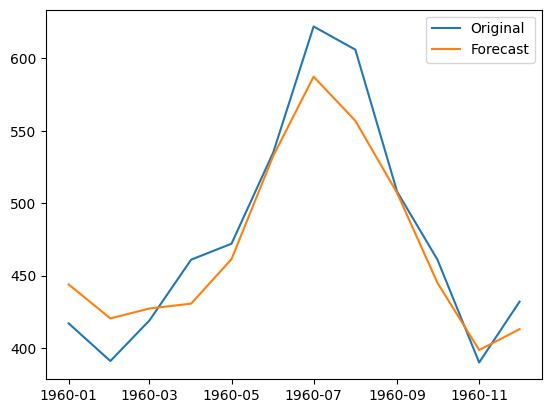

In [31]:
plt.plot(df_test['Date'], df_test['Passengers'], label='Original')
plt.plot(df_test['Date'], forecasts[np.argmin(rmse)], label='Forecast')
plt.legend()


## Forecasting using XGBoost

In [32]:
# Enter code Here

## Interpretation of the results
TODO: Also include Comparison of the results of ARIMA and XGBoost